In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import datetime as dt
from decimal import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
r = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html')

In [3]:
competitor = BeautifulSoup(r.content, 'html.parser')

In [4]:
table = competitor.find("table")

In [5]:
frames = pd.read_html(str(table), flavor='bs4')

In [6]:
compframe = frames[0]

In [7]:
compframe.columns = ["rank","x_class","date","region","start_time","max_time","end_time","movie"]

In [8]:
compframe.drop(columns=["movie"], inplace=True)

In [9]:
#compframe

In [10]:
def time_formatter(datetime):
    time = dt.datetime.strptime(datetime,"%Y/%m/%d %H:%M")
    #time = time.strftime("%Y-%m-%d %H:%M:%S")
    return time

def get_datetime(row, date, time, year=None):
    if pd.isna(row[date]) or pd.isna(row[time]):
        return np.nan
    time = row[time]
    if time[0:2] == "24":
        time = "00"+time[2:]
    datetime = row[date]+" "+time
    if year != None:
        datetime = str(year)+"/"+datetime
    return time_formatter(datetime) 

In [11]:
compframe["start_datetime"] = compframe.apply(lambda row: get_datetime(row,"date","start_time"), axis=1)
compframe["max_datetime"] = compframe.apply(lambda row: get_datetime(row,"date","max_time"), axis=1)
compframe["end_datetime"] = compframe.apply(lambda row: get_datetime(row,"date","end_time"), axis=1)

compframe.drop(columns=["start_time","max_time","end_time"], inplace=True)

In [12]:
compframe = compframe[['rank', 'x_class',  'start_datetime', 'max_datetime', 'end_datetime', 'region']]
compframe

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [13]:
r2 = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")

In [14]:
nasa = BeautifulSoup(r2.content, 'html.parser')
nasatable = nasa.find("pre")

In [15]:
data = nasatable.get_text()
data = data.split("\n")
data = data[12:530]
table = [string.split()[0:15] for string in data]

In [16]:
nasaframe = pd.DataFrame(table)
nasaframe.columns = ["start_date", "start_time", "end_date", "end_time", "start_frequency", "end_frequency",
                    "flare_location", "flare_region", "x-ray_importance", "cme_date", "cme_time", "cpa", "width", 
                    "speed", "plot"]

In [17]:
def missingfreq(freq):
    if freq == "????":
        return np.nan
    else:
        return freq
    
def missinglocation(loc):
    if loc == "------" or loc == "back" or loc == "Back" or loc == "BACK" or loc == "Back?":
        return np.nan
    else:
        return loc
    
def missingregion(region):
    if region == "-----" or region == "FILA" or region == "DSF" or region == "altr" or region == "EP" or region == "DIM":
        return np.nan
    else:
        return region

def missingImportance(x_ray):
    if x_ray == "----" or x_ray == "FILA":
        return np.nan
    else:
        return x_ray
    
def missingCME():
    for index in nasaframe.index:
        if nasaframe.loc[index,"cme_date"] == "--/--":
            nasaframe.loc[index,"cme_date"] = np.nan
        if nasaframe.loc[index,"cme_time"] == "--:--":
            nasaframe.loc[index,"cme_time"] = np.nan
        if nasaframe.loc[index,"cpa"] == "----":
            nasaframe.loc[index,"cpa"] = np.nan
        if nasaframe.loc[index, "width"] == "----" or nasaframe.loc[index, "width"] == "---":
            nasaframe.loc[index, "width"] = np.nan
        if nasaframe.loc[index, "speed"] == "----":
            nasaframe.loc[index, "speed"] = np.nan
    
def isLowerbd(row):
    if not isinstance(row["width"],float):
        return row["width"][0] == ">"
    return False

def modifyWidth():
    for index in nasaframe.index:
        if not isinstance(nasaframe.loc[index, "width"], float):
            if nasaframe.loc[index, "width"][0] == ">":
                nasaframe.loc[index, "width"] = float(nasaframe.loc[index, "width"][1:])

def haloCheck(row):
    if row["cpa"] == "Halo":
        return np.nan
    return row["cpa"]

In [18]:
nasaframe["start_frequency"] = nasaframe["start_frequency"].apply(missingfreq)
nasaframe["end_frequency"] = nasaframe["end_frequency"].apply(missingfreq)
nasaframe["flare_location"] = nasaframe["flare_location"].apply(missinglocation)
nasaframe["flare_region"] = nasaframe["flare_region"].apply(missingregion)
nasaframe["x-ray_importance"] = nasaframe["x-ray_importance"].apply(missingImportance)
missingCME()
nasaframe["is_halo"] = nasaframe.apply(lambda row: row["cpa"] == "Halo", axis=1)
nasaframe["cpa"] = nasaframe.apply(lambda row: haloCheck(row), axis=1)
nasaframe["width_lower_bound"] = nasaframe.apply(lambda row: isLowerbd(row), axis=1)
modifyWidth()
nasaframe["year"] = nasaframe.apply(lambda row: row["start_date"].split("/")[0], axis=1)
nasaframe["start_datetime"] = nasaframe.apply(lambda row: get_datetime(row,"start_date","start_time"), axis=1)
nasaframe["cme_datetime"] = nasaframe.apply(lambda row: get_datetime(row,"cme_date","cme_time",row["year"]), axis=1)
nasaframe["end_datetime"] = nasaframe.apply(lambda row: get_datetime(row,"end_date","end_time",row["year"]), axis=1)
nasaframe.drop(columns=["start_date","start_time","end_date","end_time","cme_date","cme_time","year"], inplace=True)


In [19]:
nasaframe = nasaframe[["start_datetime",  "end_datetime", "start_frequency", "end_frequency", "flare_location", "flare_region", "x-ray_importance", "cme_datetime", "cpa", "width", "speed", "plot", "is_halo", "width_lower_bound"]]

In [20]:
nasaframe

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,x-ray_importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NaN,360,1418,PHTX,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,PHTX,False,False


In [21]:
x_class_flares = nasaframe[nasaframe['x-ray_importance'].str[0] == "X"]
x_class_flares

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,x-ray_importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False
14,1998-04-23 06:00:00,1998-04-23 15:30:00,14000,200,S17E90,8210,X1.2,1998-04-23 05:55:00,NaN,360,1691,PHTX,True,False
16,1998-04-27 09:20:00,1998-04-27 10:00:00,10000,1000,S16E50,8210,X1.0,1998-04-27 08:56:00,NaN,360,1385,PHTX,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2014-06-10 12:58:00,2014-06-10 15:00:00,16000,1000,S17E82,12087,X1.5,2014-06-10 13:30:00,NaN,360,1469,PHTX,True,False
467,2014-09-10 17:45:00,2014-09-11 12:00:00,14000,100,N14E02,12158,X1.6,2014-09-10 18:00:00,NaN,360,1267,PHTX,True,False
487,2015-05-05 22:24:00,2015-05-05 23:14:00,14000,500,N15E79,12339,X2.7,2015-05-05 22:24:00,NaN,360,715,PHTX,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False


In [22]:
def makeXfloats(dataframe):
    indexes = []
    values = []
    for index in dataframe.index:
        indexes.append(index)
        values.append(float(dataframe.loc[index, 'x-ray_importance'][1:]))
    series = pd.Series(values, index=indexes)
    return series

series = makeXfloats(x_class_flares)
idx = series.sort_values(ascending=False).index
      

In [23]:
ranked_x_flares = x_class_flares.loc[idx]
nasaTop50 = ranked_x_flares.head(50)
nasaTop50 = nasaTop50[["x-ray_importance","start_datetime","cme_datetime", "end_datetime", "flare_region"]]
nasaTop50

,x-ray_importance,start_datetime,cme_datetime,end_datetime,flare_region
240,X28.,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-04 00:00:00,10486
117,X20.,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,9393
233,X17.,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-29 00:00:00,10486
126,X14.,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,9415
234,X10.,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-29 00:00:00,10486
8,X9.4,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,8100
514,X9.3,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,12673
328,X9.0,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00,10930
237,X8.3,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,10486
515,X8.3,2017-09-10 16:02:00,2017-09-10 16:00:00,2017-09-11 06:50:00,NaN


In [24]:
#The two top 50 tables share some of the same data. 
#A lot of the solar flares in the nasa top50 is represented in the competitors data however it seems that the competitor
#has recorded solar flares that arent in nasas records.
#Thus the same exact top 50 cannot be replicated using only NASAs data

In [25]:
def modify_comp_region(dataframe):
    for index in dataframe.index:
        if dataframe.loc[index,"region"] < 8000:
            dataframe.loc[index,"region"] = dataframe.loc[index, "region"] + 10000
    return dataframe
modify_comp_region(compframe)

/Users/iiykeazu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,10486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,10486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,10808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,10486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,12673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,10930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,10486


In [26]:
#critieria for best match
##1. classification is X-class and within .5 unit of each other  = 4
##2. same region --- weight = 2
##3. within 3-hour period of each others start_date --- weight = 2
##3. within 3-hour period of each others max/cme_date --- weight = 2
##4. within 3-hour period of each others end_date --- weight = 2

In [27]:
ranked_x_flares

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,x-ray_importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2000-07-11 13:00:00,2000-07-11 13:30:00,12000,1000,N18E27,9077,X1.0,2000-07-11 13:27:00,NaN,360,1078,PHTX,True,False
428,2013-11-19 10:39:00,2013-11-19 20:20:00,14000,100,S14W70,11893,X1.0,2013-11-19 10:36:00,NaN,360,740,PHTX,True,False
16,1998-04-27 09:20:00,1998-04-27 10:00:00,10000,1000,S16E50,8210,X1.0,1998-04-27 08:56:00,NaN,360,1385,PHTX,True,False
153,2001-11-04 16:30:00,2001-11-06 11:00:00,14000,70,N06W18,9684,X1.0,2001-11-04 16:35:00,NaN,360,1810,PHTX,True,False


In [28]:
def classmatch(nasarow,comprow):
    a = Decimal(nasarow["x-ray_importance"][1:])
    b = Decimal(comprow["x_class"][1:].strip(" +"))
    if abs(a-b) <= .3:
        return 4
    return 0
def regionmatch(nasarow,comprow):
    if str(nasarow["flare_region"]) == str(comprow["region"]):
        return 4
    return 0
def within3hours(datetime1,datetime2):
    diff = datetime1-datetime2
    return dt.timedelta(hours=-3) <= diff <= dt.timedelta(hours=3)
def startdatematch(nasarow,comprow):
    if within3hours(nasarow["start_datetime"],comprow["start_datetime"]):
        return 4
    return 0
def maxdatematch(nasarow,comprow):
    if within3hours(nasarow["cme_datetime"],comprow["max_datetime"]):
        return 4
    return 0
def enddatematch(nasarow,comprow):
    if within3hours(nasarow["end_datetime"],comprow["end_datetime"]):
        return 4
    return 0

def findmatch(row):
    classmatchseries = ranked_x_flares.apply(lambda nasarow: classmatch(nasarow,row), axis=1)
    regionmatchseries = ranked_x_flares.apply(lambda nasarow: regionmatch(nasarow,row), axis=1)
    startmatchseries = ranked_x_flares.apply(lambda nasarow: startdatematch(nasarow,row), axis=1)
    maxmatchseries = ranked_x_flares.apply(lambda nasarow: maxdatematch(nasarow,row), axis=1)
    enddateseries = ranked_x_flares.apply(lambda nasarow: enddatematch(nasarow,row), axis=1)
    matchinfo = pd.concat([classmatchseries, regionmatchseries, startmatchseries, maxmatchseries, enddateseries], axis=1)
    matchinfo = matchinfo.sum(axis=1)
    matchinfo = matchinfo.sort_values(ascending=False)
    return matchinfo
    

In [29]:
matched_indices = [] 
ranks = []
for index, row in compframe.iterrows():
    match_info = findmatch(row)
    for index, value in match_info.items():
        if value >= 12:
            matched_indices.append(index)
            ranks.append(row["rank"])
            break
matched_data = ranked_x_flares.loc[matched_indices]
matched_data["rank"] = ranks


In [30]:
matched_data

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,x-ray_importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound,rank
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,1
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,3
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,5
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,6
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,7
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,8
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,9
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,10
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False,11


In [31]:
nasaframe

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,x-ray_importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NaN,360,1418,PHTX,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,PHTX,False,False


<AxesSubplot:title={'center':'Ratio of halos for top flares vs all flares'}>

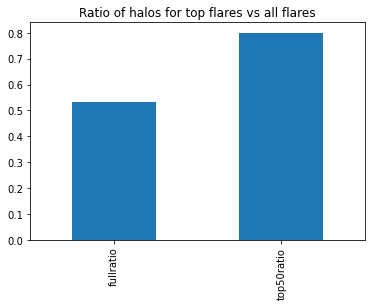

In [60]:
halos = nasaframe["is_halo"].value_counts()
tophalos = matched_data["is_halo"].value_counts()
halos.loc[True] = halos.loc[True] - tophalos[True]
ratios = pd.Series([halos.loc[True]/(518-35),tophalos.loc[True]/35], index=['fullratio','top50ratio'])
plt.figure();
ratios.plot(kind="bar", title="Ratio of halos for top flares vs all flares")

In [ ]:
# I wanted to see how whether powerful flares are more likely to be halos. 
# In order to do this I found the ratio of flares that are halos for the most powerful flares vs all other flares
# and I found that powerful flares are more likely to be halos as 80% of the top 35 flares were halos